# Bibliotecas

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree 
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Font, Alignment
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Import dos dados

In [4]:
df = pd.read_csv("tb_2013_2015_2017_2019_municipio.csv")

dfAnosIniciais = df.copy()

dfAnosIniciaisTeste = df.copy()

In [ ]:
# Pré-Processamento dos dados de treino e teste dos anos iniciais

# Removendo colunas que não serão utilizadas
colunas_a_serem_dropadas = [
        "nomePais", "codRegiao", "nomeRegiao", "codEstado", "codMunicipio","valor", "AFDMedioG1", "AFDMedioG2","AFDMedioG3",
         "AFDMedioG4", "AFDMedioG5","ATUMedioTotal", "ATUMedio1Serie",
         "ATUMedio2Serie", "ATUMedio3Serie", "ATUMedioNaoSeriado", "ATUMedio4Serie", "IEDEnsinoMedioNivel5", 
         "DSUMedio", "HADMedioTotal", "HADMedio1Serie", "HADMedio2Serie",
         "HADMedio3Serie", "HADMedio4Serie", "HADMedioNaoSeriado",
         "ICGNivelMedio", "IEDEnsinoMedioNivel1","IEDEnsinoMedioNivel2",
         "IEDEnsinoMedioNivel3", "IEDEnsinoMedioNivel4", "IEDEnsinoMedioNivel6",
         "TDIMedio1Serie","TDIMedio2Serie", "TDIMedio3Serie", "TDIMedio4Serie", "nomeMunicipio", "nomeEstado", "AFDInfantilG2",
        "AFDInfantilG3", "AFDInfantilG4", "AFDInfantilG5", "AFDFundamentalTotalG1", "AFDFundamentalTotalG2", "AFDFundamentalTotalG3", "AFDFundamentalTotalG4",
        "AFDFundamentalTotalG5", "InvestAlunoInfantil", "InvestAlunoMedio", "AFDInfantilG1", "ATUInfantilTotal", "ATUInfantilCreche", "ATUInfantilPreEscola",
        "ATUFundamentalTotal", "ATUFundamental1Ano", "ATUFundamental2Ano",
        "ATUFundamental3Ano", "ATUFundamental4Ano", "ATUFundamental5Ano",
        "ATUFundamentalMultietapa", "DSUInfantilTotal", "DSUInfantilCreche",
        "DSUInfantilPreEscola", "DSUFundamentalTotal", "HADInfantilTotal", 
        "HADInfantilCreche", "HADInfantilPreEscola", "HADFundamentalTotal",
        "HADFundamental1Ano", "HADFundamental2Ano", "HADFundamental3Ano", 
        "HADFundamental4Ano", "HADFundamental5Ano", "IEDFundamentalTotalNivel1", "IEDFundamentalTotalNivel2", 
        "IEDFundamentalTotalNivel3", "IEDFundamentalTotalNivel4",
        "IEDFundamentalTotalNivel5", "IEDFundamentalTotalNivel6",
        "IRDMediaTotal", "TDIFundamental1Ano", "TDIFundamental2Ano",
        "TDIFundamental3Ano", "TDIFundamental4Ano", "TDIFundamental5Ano",'ATUFundamental8Ano', 'ATUFundamental9Ano','HADFundamental6Ano', 'HADFundamental7Ano',
       'HADFundamental8Ano', 'HADFundamental9Ano','TDIFundamental6Ano', 'TDIFundamental7Ano', 'TDIFundamental8Ano',
       'TDIFundamental9Ano','anosFinais','TDIMedioTotal', 'TDIFundamentalAnosFinais','HADFundamentalAnosFinais',
       'AFDFundamentalAnosFinaisG1', 'AFDFundamentalAnosFinaisG2','DSUFundamentalFinal',
       'AFDFundamentalAnosFinaisG3', 'AFDFundamentalAnosFinaisG4','DSUFundamentalFinal',
       'AFDFundamentalAnosFinaisG5', 'AFDFundamentalAnosFinaisG1', 'AFDFundamentalAnosFinaisG2',
       'AFDFundamentalAnosFinaisG3', 'AFDFundamentalAnosFinaisG4',
       'AFDFundamentalAnosFinaisG5', 'ATUFundamentalAnosFinais', 'ATUFundamental6Ano', 'ATUFundamental7Ano',
       'IEDFundamentalAnosFinaisNivel1', 'IEDFundamentalAnosFinaisNivel2',
       'IEDFundamentalAnosFinaisNivel3', 'IEDFundamentalAnosFinaisNivel4',
       'IEDFundamentalAnosFinaisNivel5', 'IEDFundamentalAnosFinaisNivel6',
        "TDIFundamentalTotal"
]

# Pré-processamento dos dados para dfAnosIniciais
dfAnosIniciais.drop(colunas_a_serem_dropadas, axis=1, inplace=True)

# Pré-processamento dos dados para dfAnosFinaisTeste
dfAnosIniciaisTeste.drop(colunas_a_serem_dropadas, axis=1, inplace=True)

dfAnosIniciais.fillna("NaN")
dfAnosIniciais[:] = np.nan_to_num(dfAnosIniciais)
dfAnosIniciaisTeste.fillna("NaN")
dfAnosIniciaisTeste[:] = np.nan_to_num(dfAnosIniciaisTeste)

# Análises

Modelo (2013,) prevendo 2015:
Resultados: 
MSE: 1.6413423995225374
RMSE: 1.2811488592363252
MAE: 0.8048645930794714

Modelo (2015,) prevendo 2017:
Resultados: 
MSE: 1.7091925898459668
RMSE: 1.3073609256230534
MAE: 0.7688600235598807

Modelo (2017,) prevendo 2019:
Resultados: 
MSE: 0.919861831863979
RMSE: 0.9590942768382986
MAE: 0.6087337252719488

Modelo (2013, 2015) prevendo 2017:
Resultados: 
MSE: 1.5917914425869784
RMSE: 1.2616621745090792
MAE: 0.7681691292034075

Modelo (2015, 2017) prevendo 2019:
Resultados: 
MSE: 1.369712100776927
RMSE: 1.1703470001571872
MAE: 0.6833091423457046

Modelo (2013, 2015, 2017) prevendo 2019:
Resultados: 
MSE: 1.5842708943420878
RMSE: 1.2586782330453197
MAE: 0.7562546147591132



[Text(0.51875, 0.9166666666666666, 'node #0\nIRDAlta <= 0.221\nsquared_error = 2.084\nsamples = 100.0%\nvalue = 5.134'),
 Text(0.26666666666666666, 0.75, 'node #1\nAFDFundamentalAnosIniciaisG5 <= -1.935\nsquared_error = 2.02\nsamples = 58.8%\nvalue = 5.677'),
 Text(0.13333333333333333, 0.5833333333333334, 'node #2\nIRDbaixa <= -3.113\nsquared_error = 9.009\nsamples = 2.0%\nvalue = 3.736'),
 Text(0.06666666666666667, 0.4166666666666667, 'node #3\nInvestNaoDocentes <= 2.244\nsquared_error = 8.987\nsamples = 0.6%\nvalue = 2.138'),
 Text(0.03333333333333333, 0.25, 'node #4\nInvestDocentes <= 1.406\nsquared_error = 8.373\nsamples = 0.5%\nvalue = 1.828'),
 Text(0.016666666666666666, 0.08333333333333333, 'node #5\nsquared_error = 0.0\nsamples = 0.1%\nvalue = 0.0'),
 Text(0.05, 0.08333333333333333, 'node #6\nsquared_error = 9.819\nsamples = 0.4%\nvalue = 2.534'),
 Text(0.1, 0.25, 'node #7\nICGNivel6 <= 0.206\nsquared_error = 0.998\nsamples = 0.0%\nvalue = 5.92'),
 Text(0.08333333333333333, 0.0

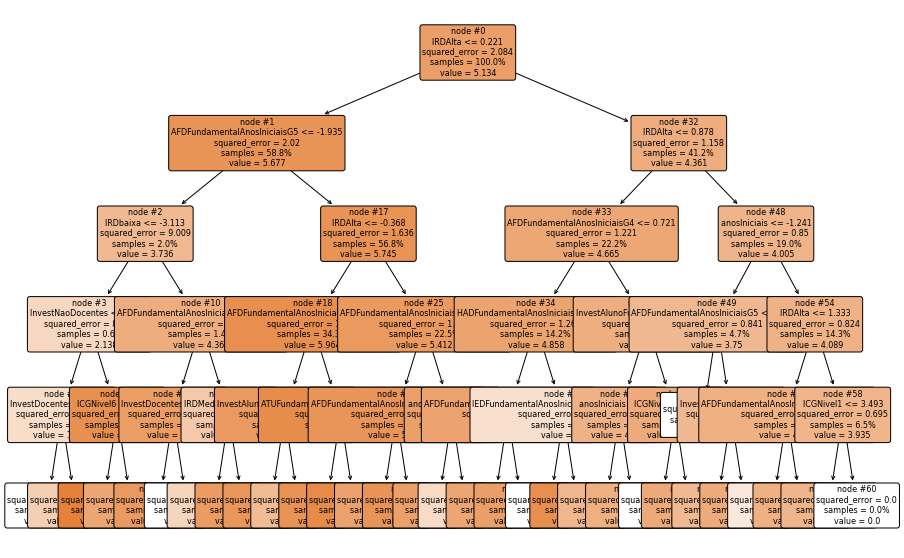

In [ ]:
# Análises

# análise 1: 2013 para prever 2015
# análise 2: 2015 para prever 2017
# análise 3: 2017 para prever 2019
# análise 4: 2013 + 2015 para prever 2017
# análise 5: 2015 + 2017 para prever 2019
# análise 6: 2013 + 2015 + 2017 para prever 2019

# Lista de combinações de anos
combinacoes_anos = [
    (2013, 2015),
    (2015, 2017),
    (2017, 2019),
    (2013, 2015, 2017),
    (2015, 2017, 2019),
    (2013, 2015, 2017, 2019)
]

# Dicionário para armazenar os modelos de Árvore:
modelos = {}

# Loop pelas Combinações de anos:
for combo in combinacoes_anos:
    anos_treino = list(combo[:-1])
    ano_teste = combo[-1]

    # Filtrar os dados de treinamento e teste
    df_treino = dfAnosIniciais[dfAnosIniciais["Ano"].isin(anos_treino)]
    df_teste = dfAnosIniciaisTeste[dfAnosIniciaisTeste["Ano"] == ano_teste]

    # Separar as variáveis independentes e a variável alvo
    X_treino = df_treino.drop(["Ano", "anosIniciais"], axis=1)
    y_treino = df_treino["anosIniciais"]

    X_teste = df_teste.drop(["Ano", "anosIniciais"], axis=1)
    y_teste = df_teste["anosIniciais"]

    # Train_test_split
    X_treino, X_teste, y_treino, y_teste = train_test_split(X_treino, y_treino, test_size=0.3, random_state=1)

    # armazenando os nomes das colunas:
    column = df_treino.columns.tolist()

    # Quantile Transformer
    from sklearn.preprocessing import QuantileTransformer
    qt = QuantileTransformer(output_distribution="normal")
    X_treino = qt.fit_transform(X_treino)
    X_teste = qt.transform(X_teste)

    # Criar o modelo de Árvore de Decisão
    modelo = DecisionTreeRegressor(max_depth=5, random_state=1)

    # Treinar o modelo
    modelo.fit(X_treino, y_treino)

    # Realizar previsoes nos dados de teste
    y_pred = modelo.predict(X_teste)

    # Nome da análise
    nome_analise = f"Modelo {combo[:-1]} prevendo {ano_teste}:"

    # Armazenr o modelo e resultados
    modelos[nome_analise] = {
        "modelo": modelo,
        "resultados": {
            "MSE": metrics.mean_squared_error(y_teste, y_pred),
            "RMSE": np.sqrt(metrics.mean_squared_error(y_teste, y_pred)),
            "MAE": metrics.mean_absolute_error(y_teste, y_pred)
        }
    }    

# Mostrar os resultados
for nome_analise, resultados in modelos.items():
    print(nome_analise)
    print("Resultados: ")
    for metrica, valor in resultados["resultados"].items():
        print(f"{metrica}: {valor}")
    print()

# Feature Importance:
importance = modelo.feature_importances_

for i, v in enumerate(importance):
    print(f"Feature: {column[i]}, Score: {v:3f}")

# Converter o dicionario de resultados em um dataframe
df_resultados = pd.DataFrame({k: v["resultados"] for k, v in modelos.items()}).T

# criar um novo arquivo excel:
wb = Workbook()

# Planilha para os Resultados
wb_resultados = wb.active
wb_resultados.title = "Resultados Arvore de Decisao Anos Finais Intra Ano"

# Formataçao
font_title = Font(bold=True)
alignment_center = Alignment(horizontal="center")

# Adicionar o Título para a planilha de resultados
wb_resultados.append(["Análise"])
wb_resultados["A1"].font = font_title
wb_resultados["A1"].alignment = alignment_center

# Adicionar as colunas do DF de resultados
for row in dataframe_to_rows(df_resultados, index=True, header=True):
    wb_resultados.append(row)

# Nova planilha para o feature importance
wb_feature_importance = wb.create_sheet("Feature Importance")

# Formataçao para planila de feature importance
font_title = Font(bold=True)
alignment_center = Alignment(horizontal="center")

# Adicionar um título à planilha de Feature Importance
wb_feature_importance["A1"] = "Feature"
wb_feature_importance["A1"].font = font_title
wb_feature_importance["A1"].alignment = alignment_center
wb_feature_importance["B1"] = "Importance"
wb_feature_importance["B1"].font = font_title
wb_feature_importance["B1"].alignment = alignment_center

# Adicionar as informações do Feature Importance às colunas da planilha
for i, (feature, importance) in enumerate(zip(column, importance)):
    row_index = i + 2  # Começando da linha 2 (após o título)
    wb_feature_importance[f"A{row_index}"] = feature
    wb_feature_importance[f"B{row_index}"] = importance


# Salvar o arquivo
wb.save("ResultadosArvore_AnosIniciais_Inter.xlsx")


# plotando a árvore:
plt.figure(figsize=(15, 10))
tree.plot_tree(modelo, max_depth=None, filled=True, label='all', precision=3, rounded=True, impurity=True, node_ids=True, proportion=True, feature_names=column, fontsize=8)

# Feature Importance:

Feature: InvestAlunoFundamental, Score: 0.028
Feature: InvestDocentes, Score: 0.021
Feature: InvestNaoDocentes, Score: 0.009
Feature: anosIniciais, Score: 0.014
Feature: AFDFundamentalAnosIniciaisG1, Score: 0.000
Feature: AFDFundamentalAnosIniciaisG2, Score: 0.023
Feature: AFDFundamentalAnosIniciaisG3, Score: 0.006
Feature: AFDFundamentalAnosIniciaisG4, Score: 0.042
Feature: AFDFundamentalAnosIniciaisG5, Score: 0.145
Feature: ATUFundamentalAnosIniciais, Score: 0.008
Feature: DSUFundamentalInicial, Score: 0.000
Feature: HADFundamentalAnosIniciais, Score: 0.008
Feature: ICGNivel1, Score: 0.002
Feature: ICGNivel2, Score: 0.000
Feature: ICGNivel3, Score: 0.000
Feature: ICGNivel4, Score: 0.000
Feature: ICGNivel5, Score: 0.000
Feature: ICGNivel6, Score: 0.003
Feature: IEDFundamentalAnosIniciaisNivel1, Score: 0.000
Feature: IEDFundamentalAnosIniciaisNivel2, Score: 0.006
Feature: IEDFundamentalAnosIniciaisNivel3, Score: 0.000
Feature: IEDFundamentalAnosIniciaisNivel4, Score: 0.000
Feature: IED

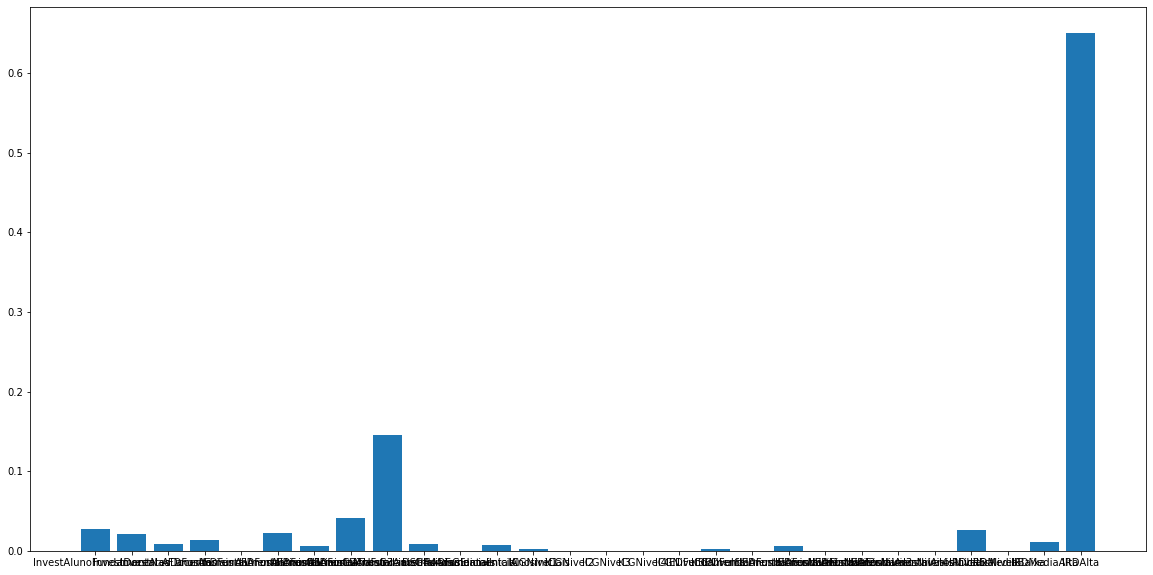

In [ ]:
# Feature Importance:
importance = modelo.feature_importances_

for i, v in enumerate(importance):
    print(f"Feature: {column[i]}, Score: {v:.3f}")
    

print("Número de posições no gráfico de barras:", len(importance))
print("Tamanho da lista de colunas:", len(column))

# Corte as listas para que tenham o mesmo tamanho (28 elementos)
importance = importance[:len(column)]
column = column[:len(importance)]

# Plot do feature importance com os nomes das features:
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(importance)), column)
plt.show()

